In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.datasets import make_circles
import tensorflow as tf

import os
import random

In [158]:
#reading train and test csv files 
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [159]:
train_copy = train.copy()
test_copy = test.copy()

### Gathering information from the train and test data

In [160]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [161]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [163]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [164]:
#dropping unnecessary column both train and test
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

#dropping Ticket coloumn [Ticket numbers]
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

#dropping Name coloumn 
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

<hr style="color: black;">


## <center> Handle Missing Values.

* ### Handle Missing Values in <b>Train data</b>

In [165]:
print("\n------------------ Null values in train data----------------------------")
print(train.isnull().sum())

print("\n------------------ Null values in test data----------------------------")
print(test.isnull().sum())



------------------ Null values in train data----------------------------
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

------------------ Null values in test data----------------------------
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [166]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [167]:
# train Embarked have --2 null values
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy= "most_frequent")
mode_col = ["Embarked"]
train["Embarked"] = pd.DataFrame(si.fit_transform(train[mode_col]), index=train.index, columns=mode_col)

In [168]:
print(train["Age"].mean())
print(train["Age"].mode())

29.69911764705882
0    24.0
Name: Age, dtype: float64


In [169]:
# train Age have --177 null values

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy= "mean")
mean_col = ["Age"]
train["Age"] = pd.DataFrame(si.fit_transform(train[mean_col]), index=train.index, columns=mean_col)

In [170]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

    * null values are handeled in train data.

* ###  Handle Missing Values in <b>Test data</b>

In [171]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [172]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [173]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy= "mean")
mean_col = ["Age"]
test["Age"] = pd.DataFrame(si.fit_transform(test[mean_col]), index=test.index, columns=mean_col)

In [174]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<hr style="color: cyan;">
<hr style="color: cyan;">


# <center> <b>Exploratory Data Analysis</b>

<hr style="color: cyan;">
<hr style="color: cyan;">


In [175]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


* create new family column.

In [176]:
#[parch -># of parents / children aboard the Titanic] 
#[sibsp -> # of siblings / spouses aboard the Titanic]

#merging the sibsp and parch columns to 'Family'  
train['family']=train['SibSp']+train['Parch']+1
test['family']=test['SibSp']+test['Parch']+1


train.drop(columns=['PassengerId','SibSp','Parch'],inplace=True)
test.drop(columns=['PassengerId','SibSp','Parch'],inplace=True)

In [177]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


-           survived on Pclass column.

In [178]:
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [179]:

train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Survived'>

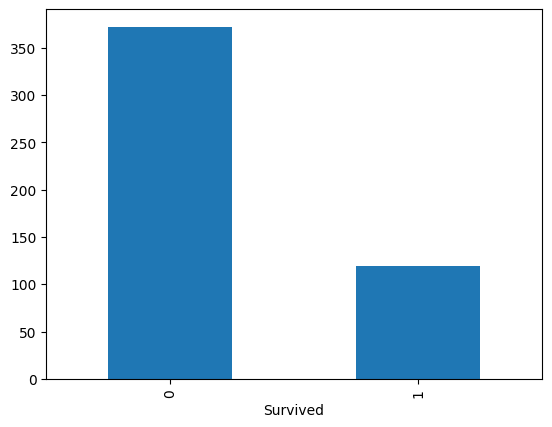

In [180]:
train[train["Pclass"]==3]["Survived"].value_counts().plot(kind="bar")

<Axes: xlabel='Survived'>

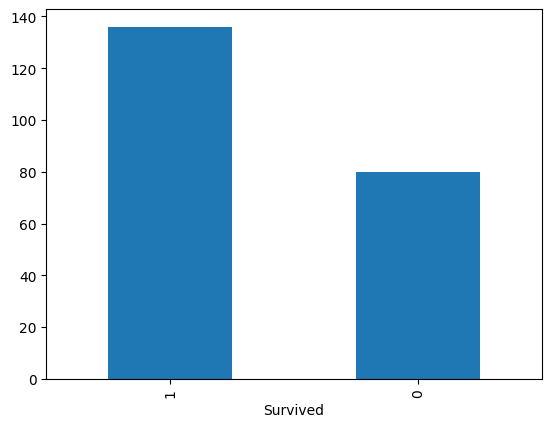

In [181]:
train[train['Pclass']==1]['Survived'].value_counts().plot(kind="bar")

In [182]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

-   * survived on Sex column.

<Axes: xlabel='Sex'>

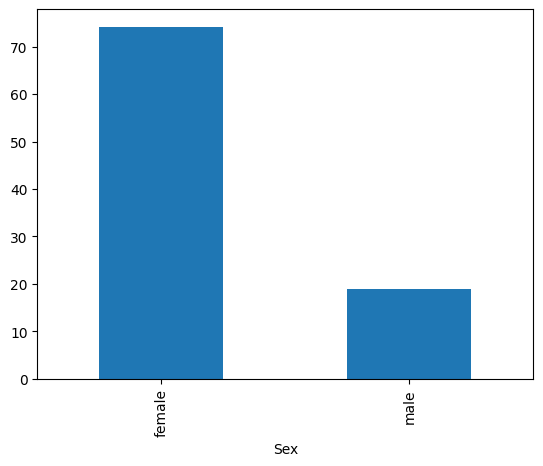

In [183]:
sex_plot = train.groupby(['Sex'])['Survived'].mean()*100
sex_plot
sex_plot.plot(kind = "bar")

-   * survived on Embarked column.

<Axes: xlabel='Embarked'>

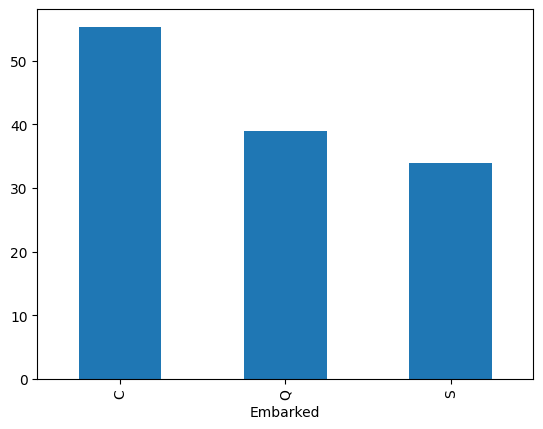

In [184]:
embark = train.groupby(['Embarked'])['Survived'].mean()*100
embark
embark.plot(kind = "bar")

-   * survived on Age column.

C:\Users\Manish Gupta\AppData\Local\Temp\ipykernel_5720\681994515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0], color="red", label="not Survived")
C:\Users\Manish Gupta\AppData\Local\Temp\ipykernel_5720\681994515.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

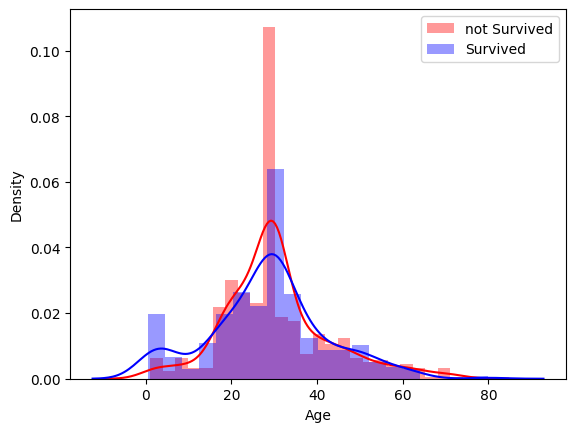

In [185]:
sns.distplot(train['Age'][train['Survived']==0], color="red", label="not Survived")
sns.distplot(train['Age'][train['Survived']==1], color = "blue", label="Survived")
plt.legend()
plt.show()

* from the above graph ,we can conclude that the passengers of age around 30 have higher chances of not surviving, rather than children and senior citizens

C:\Users\Manish Gupta\AppData\Local\Temp\ipykernel_5720\2254294554.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0], color="red", label="not Survived")
C:\Users\Manish Gupta\AppData\Local\Temp\ipykernel_5720\2254294554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

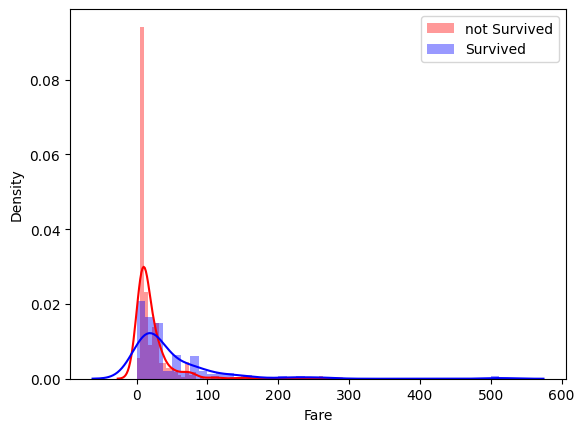

In [186]:
sns.distplot(train['Fare'][train['Survived']==0], color="red", label="not Survived")
sns.distplot(train['Fare'][train['Survived']==1], color = "blue", label="Survived")
plt.legend()
plt.show()

#### The above graph states that passengers who've paid more fare , have higher chance of surviving

-   * survived on family column.

In [187]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [188]:
test['family'].value_counts().index

Index([1, 2, 3, 4, 5, 7, 11, 6, 8], dtype='int64', name='family')

In [189]:
#grouping Survived column by family to check survival chance
train.groupby(['family'])['Survived'].mean().sort_values(ascending=False)

family
4     0.724138
3     0.578431
2     0.552795
7     0.333333
1     0.303538
5     0.200000
6     0.136364
8     0.000000
11    0.000000
Name: Survived, dtype: float64

* creating bins.

In [190]:
import pandas as pd

# Assuming you have a 'family' column in your DataFrames
bin_edges = [0,1, 2, 6, 8]
bin_labels = ["Single", "Couple", "medium", "Large"]

# Use pd.cut to create bins
train["family_size"] = pd.cut(train["family"], bins=bin_edges, labels=bin_labels)
test["family_size"] = pd.cut(test["family"], bins=bin_edges, labels=bin_labels)


In [191]:
train.sample(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,family,family_size
300,1,3,female,29.699118,7.7500,Q,1,Single
40,0,3,female,40.000000,9.4750,S,2,Couple
100,0,3,female,28.000000,7.8958,S,1,Single
552,0,3,male,29.699118,7.8292,Q,1,Single
431,1,3,female,29.699118,16.1000,S,2,Couple
241,1,3,female,29.699118,15.5000,Q,2,Couple
240,0,3,female,29.699118,14.4542,C,2,Couple
500,0,3,male,17.000000,8.6625,S,1,Single
392,0,3,male,28.000000,7.9250,S,3,medium
868,0,3,male,29.699118,9.5000,S,1,Single


In [192]:
train.drop(columns=["family"], inplace=True)
test.drop(columns=["family"], inplace=True)

In [193]:
test.head(4)

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,male,34.5,7.8292,Q,Single
1,3,female,47.0,7.0000,S,Couple
2,2,male,62.0,9.6875,Q,Single
3,3,male,27.0,8.6625,S,Single


In [194]:
print(train.shape)
print(test.shape)

(891, 7)
(418, 6)


In [195]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Couple
1,1,1,female,38.0,71.2833,C,Couple
2,1,3,female,26.0,7.9250,S,Single
3,1,1,female,35.0,53.1000,S,Couple
4,0,3,male,35.0,8.0500,S,Single


In [196]:
test.head(5)

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,male,34.5,7.8292,Q,Single
1,3,female,47.0,7.0000,S,Couple
2,2,male,62.0,9.6875,Q,Single
3,3,male,27.0,8.6625,S,Single
4,3,female,22.0,12.2875,S,medium


In [197]:
train.shape

(891, 7)

<hr style="color: black;">


## Applying Encoding Techniques.-----
* Converting All categorical data into Numerical Data.

* training data

In [198]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [199]:
train.shape

(891, 11)

In [200]:
train

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Couple,family_size_medium,family_size_Large
0,0,22.000000,7.2500,False,True,True,False,True,True,False,False
1,1,38.000000,71.2833,False,False,False,False,False,True,False,False
2,1,26.000000,7.9250,False,True,False,False,True,False,False,False
3,1,35.000000,53.1000,False,False,False,False,True,True,False,False
4,0,35.000000,8.0500,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,True,False,True,False,True,False,False,False
887,1,19.000000,30.0000,False,False,False,False,True,False,False,False
888,0,29.699118,23.4500,False,True,False,False,True,False,True,False
889,1,26.000000,30.0000,False,False,True,False,False,False,False,False


* test data

In [201]:
test.shape

(418, 6)

In [202]:

test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [203]:
test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Couple,family_size_medium,family_size_Large
0,34.50000,7.8292,False,True,True,True,False,False,False,False
1,47.00000,7.0000,False,True,False,False,True,True,False,False
2,62.00000,9.6875,True,False,True,True,False,False,False,False
3,27.00000,8.6625,False,True,True,False,True,False,False,False
4,22.00000,12.2875,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
413,30.27259,8.0500,False,True,True,False,True,False,False,False
414,39.00000,108.9000,False,False,False,False,False,False,False,False
415,38.50000,7.2500,False,True,True,False,True,False,False,False
416,30.27259,8.0500,False,True,True,False,True,False,False,False


In [204]:
test.shape

(418, 10)

<hr style="color: cyan;">
<hr style="color: cyan;">

# <center><b> Applying algorithm to train data and predict Survival of passengers of Titanic</b>

<hr style="color: cyan;"><hr style="color: cyan;">

In [205]:
X = train.drop(columns=["Survived"])
y = train["Survived"]

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(f'Accuracy on train_data = {lr.score(X_train, y_train)}')
print(f'Accuracy on test_data = {lr.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))

Accuracy on train_data = 0.8019662921348315
Accuracy on test_data = 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [208]:
x_final=test.iloc[:,:].values

In [209]:
y_final=lr.predict(x_final)

c:\Users\Manish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [210]:
y_final.shape

(418,)

In [211]:
#creating new dataframe
final=pd.DataFrame()

In [212]:
final['PassengerId'] = test_copy["PassengerId"]
final['Survived'] = y_final

In [213]:
final[["PassengerId","Survived"]]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [214]:
final.set_index("PassengerId", drop=True, inplace=True)

In [215]:
final

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [94]:
# creating .csv files
final.to_csv('Survival.csv')

<hr style=color:cyan>

<hr style=color:cyan>